<font color=red>Now it's your turn!</font>
# <font color=red> **Assignment 2**</font> <br>
0. use the table `Housing.csv` for this assignment
1. creat a function to find the price of square footage `price_per_sqrft`
2. creat prediction function to predict the house price from a given area `house_price_predict`
3. find the error of your prediction and add the error column to the table.  `pred_error`
3. are there factors may affect the price? test that in regard to the price of square footage, what is the highest factor may affect the price? priof you answer with resultst (I expect to perform somthing similer to predict smart)

>> ```
>>  # we catigorise the error based on each factor
>>  house.hist('pred_error', group='factor you want to test')
 ```

4. write a new function  `house_smart_prediction` that consider the impact of the most effective fctors that affect the prices of square footage.
5. test the accuracy of your prediction for the outcomes of `house_smart_prediction`

6. save your noteboock as pdf format (file--> print--> saveas pdf --> save) then submit it to the assignment link.


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
path= '/content/sample_data/'
house=Table.read_table(path+'housing.csv')
house

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


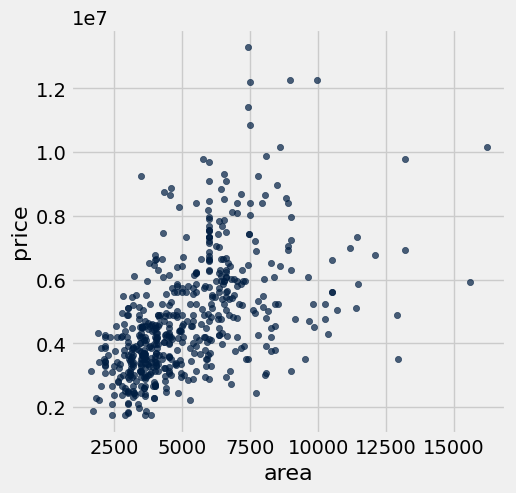

In [ ]:
house.scatter('area', 'price')

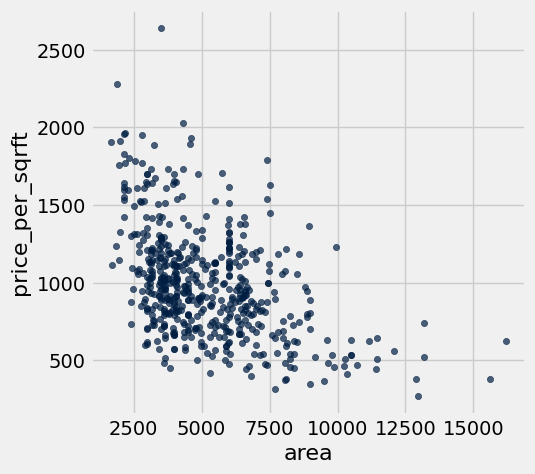

In [ ]:
def calculate_price_per_sqrft(housing_table):
    price_per_sqrft = housing_table.column('price') / housing_table.column('area')
    housing_table = housing_table.with_column('price_per_sqrft', price_per_sqrft)
    return housing_table

calculate_price_per_sqrft(house)
calculate_price_per_sqrft(house).scatter('area', 'price_per_sqrft')

Conclusion: There is negative correlation b/w price per square foot and area. Meaning the smaller the area, the higher price per square foot. This means that for a landowner who wishes to sell bigger plots of land, it would be more advantageous to divide the plot into smaller lots since he would get a better return.

In [ ]:
def house_price_predict(area):
    expected_Price = house.where('area', are.between(area - 500, area + 500))
    p=expected_Price.column('price').mean()
    return np.round(p,2)

housePred = house.apply(house_price_predict, 'area')
house = house.with_column('predictedPrice', housePred)
house

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,predictedPrice
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6.56868e+06
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.39e+06
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5.62256e+06
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6.62624e+06
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,6.56868e+06
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,6.62624e+06
10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,6.30781e+06
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,1.015e+07
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,5.74858e+06
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,5.51018e+06


In [ ]:
def pred_error(x, y):
    return x - y

pred_errs = house.apply(pred_error, 'price', 'predictedPrice')
house = house.with_column('error', pred_errs)
house

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,predictedPrice,error
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6.56868e+06,6.73132e+06
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.39e+06,4.86e+06
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5.62256e+06,6.62744e+06
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6.62624e+06,5.58876e+06
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,6.56868e+06,4.84132e+06
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,6.62624e+06,4.22376e+06
10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,6.30781e+06,3.84219e+06
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,1.015e+07,0
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,5.74858e+06,4.12142e+06
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,5.51018e+06,4.28982e+06


In [ ]:
furnish = house.group('furnishingstatus', np.average)
furnish

furnishingstatus,price average,area average,bedrooms average,bathrooms average,stories average,mainroad average,guestroom average,basement average,hotwaterheating average,airconditioning average,parking average,prefarea average,predictedPrice average,error average
furnished,5.4957e+06,5688.1,3.06429,1.37857,1.94286,,,,,,0.885714,,5.04884e+06,446852
semi-furnished,4.90752e+06,5166.34,3.00881,1.30396,1.80176,,,,,,0.735683,,4.7345e+06,173024
unfurnished,4.01383e+06,4707.6,2.83146,1.19101,1.70225,,,,,,0.488764,,4.5339e+06,-520067


In [ ]:
room = house.group(['bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement'], np.average)
room

bedrooms,bathrooms,mainroad,guestroom,basement,price average,area average,stories average,hotwaterheating average,airconditioning average,parking average,prefarea average,furnishingstatus average,predictedPrice average,error average
1,1,no,no,no,2.275e+06,3970,1,,,0,,,3.97032e+06,-1.69532e+06
1,1,yes,no,no,3.15e+06,3450,1,,,0,,,3.6434e+06,-493399
2,1,no,no,no,3.018e+06,3579.64,1,,,0.214286,,,3.9055e+06,-887503
2,1,no,no,yes,2.7125e+06,2668,1,,,0,,,3.52097e+06,-808468
2,1,no,yes,no,2.45e+06,3240,1,,,1,,,3.60296e+06,-1.15296e+06
2,1,no,yes,yes,5.04e+06,3540,1,,,0,,,3.71127e+06,1.32873e+06
2,1,yes,no,no,3.48825e+06,4828.17,1.16667,,,0.452381,,,4.48547e+06,-997217
2,1,yes,no,yes,4.2375e+06,5484.21,1.07143,,,0.928571,,,4.80265e+06,-565155
2,1,yes,yes,no,3.15e+06,2838,1.5,,,0,,,3.46206e+06,-312056
2,1,yes,yes,yes,4.6592e+06,4754,1.3,,,0.6,,,4.63202e+06,27182.3


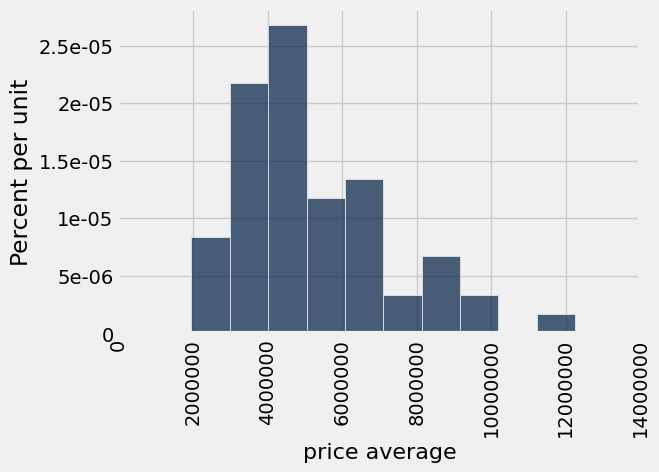

In [ ]:
room.hist('price average')

In [ ]:
mainrd = house.group('mainroad', np.average)
mainrd

mainroad,price average,area average,bedrooms average,bathrooms average,stories average,guestroom average,basement average,hotwaterheating average,airconditioning average,parking average,prefarea average,furnishingstatus average,predictedPrice average,error average
no,3.3989e+06,3606.44,2.98701,1.23377,1.54545,,,,,0.25974,,,3.92823e+06,-529326
yes,4.99178e+06,5404.59,2.96154,1.29487,1.84829,,,,,0.764957,,,4.88489e+06,106885


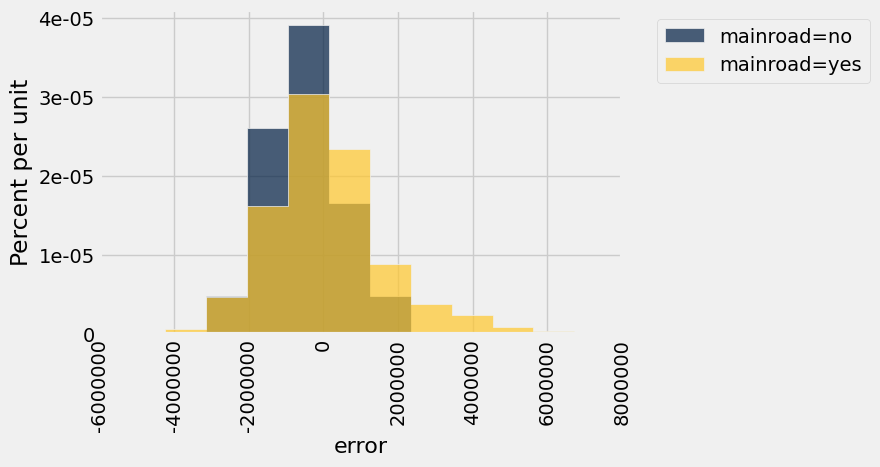

In [ ]:
house.hist('error', group='mainroad')

Whether the house is on a mainroad or not seems to be the factor that has the highest effect on the price due to a discrepency of 2 million in price when the house is on a mainroad vs not.

In [ ]:
def house_smart_prediction(area, mainroad):
    pred = house.where('area', are.between(area - 500, area + 500))
    mainrd = pred.where('mainroad', mainroad)
    return np.round(mainrd.column('price').mean(), 2)

# apply the 'predict_smart' on the table
smart_predicted_prices = house.apply(house_smart_prediction, 'area', 'mainroad')

# add the column to the table
house = house.with_column('smartPredictedPrice', smart_predicted_prices)
house

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,predictedPrice,error,smartPredictedPrice
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6.56868e+06,6.73132e+06,6.74639e+06
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.39e+06,4.86e+06,7.39e+06
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5.62256e+06,6.62744e+06,5.62256e+06
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6.62624e+06,5.58876e+06,6.71308e+06
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,6.56868e+06,4.84132e+06,6.74639e+06
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,6.62624e+06,4.22376e+06,6.71308e+06
10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,6.30781e+06,3.84219e+06,6.30781e+06
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,1.015e+07,0,1.015e+07
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,5.74858e+06,4.12142e+06,5.74858e+06
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,5.51018e+06,4.28982e+06,5.59541e+06


In [ ]:
# smart prediction error
smart_pred_errs = house.apply(pred_error, 'smartPredictedPrice', 'predictedPrice')
house = house.with_column('smartError', smart_pred_errs)
house

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,predictedPrice,error,smartPredictedPrice,smartError
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6.56868e+06,6.73132e+06,6.74639e+06,177708
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.39e+06,4.86e+06,7.39e+06,0
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5.62256e+06,6.62744e+06,5.62256e+06,0
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6.62624e+06,5.58876e+06,6.71308e+06,86840
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,6.56868e+06,4.84132e+06,6.74639e+06,177708
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,6.62624e+06,4.22376e+06,6.71308e+06,86840
10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,6.30781e+06,3.84219e+06,6.30781e+06,0
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,1.015e+07,0,1.015e+07,0
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,5.74858e+06,4.12142e+06,5.74858e+06,0
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,5.51018e+06,4.28982e+06,5.59541e+06,85227.8


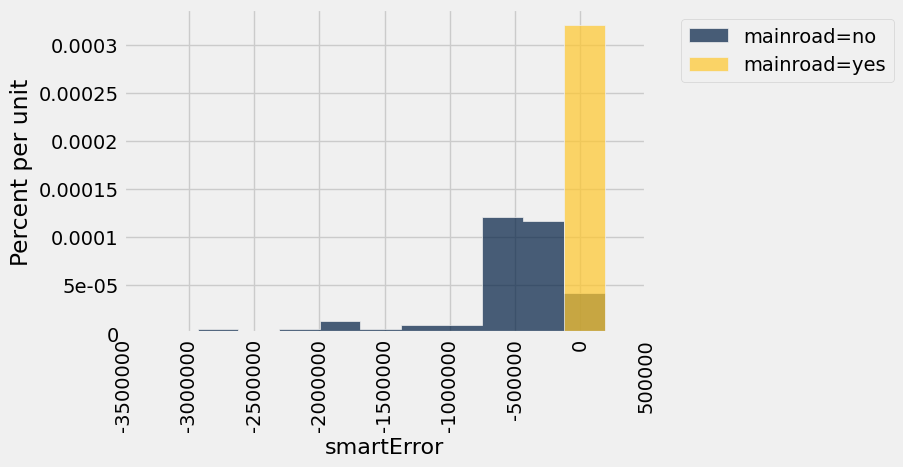

In [ ]:
house.hist('smartError', group='mainroad')

In [ ]:
# Accuracy as percentage not 1 - average error due to this specific regression model
abs_percent_errors = np.abs(house.column('smartError') / house.column('price')) * 100
mean_abs_percent_error = np.mean(abs_percent_errors)
accuracy = 100 - mean_abs_percent_error

print("Accuracy: ", accuracy)

Accuracy:  95.9659676363
